## Topic: How to make a good red wine quality



### Load the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# rename column
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploring the dataset

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# drop duplicaated value
wine.duplicated().sum()

240

In [7]:
wine.drop_duplicates(inplace = True)
wine.duplicated().sum()

0

In [8]:
wine.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Learning more about the quality

In [10]:
# Check unique value in quality column
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
wine['quality'].value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

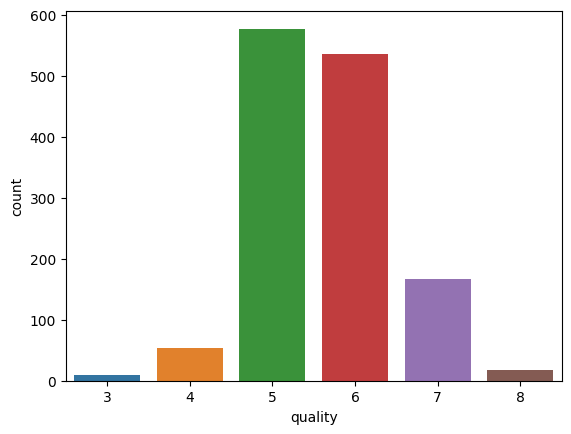

In [12]:
sns.countplot(data = wine,x='quality')

In [13]:
# create rating column
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1112
good        184
bad          63
Name: rating, dtype: int64

In [14]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.251169,0.538898,0.261286,2.484397,0.089691,16.428058,49.424910,0.996834,3.309083,0.648094,10.259173,5.481115
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.820109,0.405870,0.372880,2.703804,0.076049,13.972826,35.358696,0.995963,3.288587,0.745598,11.552808,7.092391


### Corelation between quality and other columns

<ipython-input-15-521cf3013615>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = wine.corr()


<Axes: >

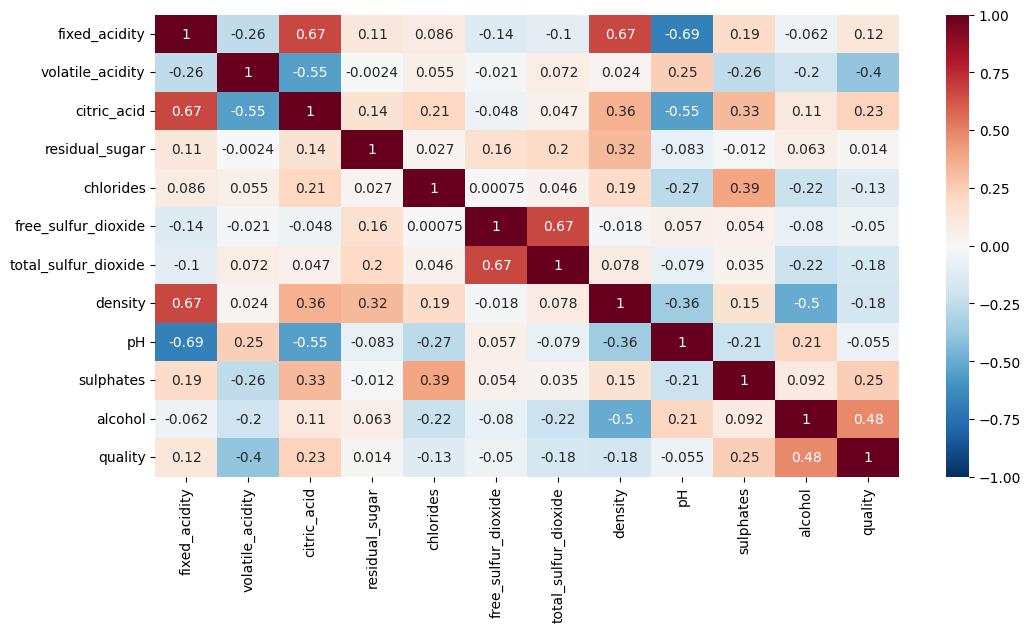

In [15]:
correlation = wine.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-1, cmap="RdBu_r")

In [16]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total_sulfur_dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64

In [17]:
# We can observe that, the 'alcohol, sulphates, citric acid & fixed acidity' have maximum corelation with response variable 'quality'

### Analysis of alcohol, sulphates, citric axid & fixed acidity with wine quality

In [18]:
# find min, max of alcohol
print('alcohol_max = ',wine['alcohol'].max())
print('alcohol_min = ', wine['alcohol'].min())

alcohol_max =  14.9
alcohol_min =  8.4


Text(0.5, 1.0, 'Alcohol percent in different wine quality types')

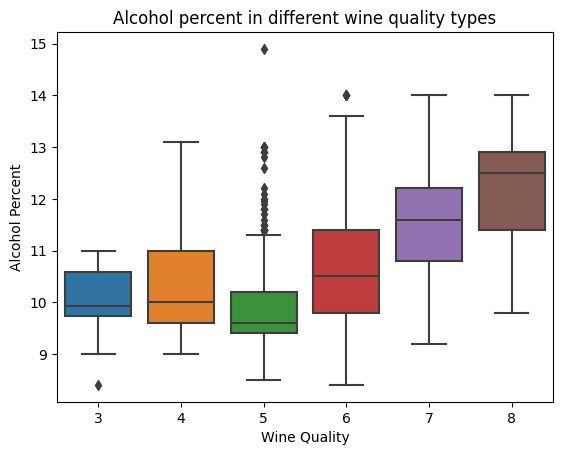

In [19]:
# Analysis of alcohol percentage with wine quality
sns.boxplot(data=wine, x= 'quality', y = 'alcohol')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Percent')
plt.title('Alcohol percent in different wine quality types')

In [20]:
# Categorize alcohol content
def alcohol_level(alcohol_percentage):
    if alcohol_percentage < 10:
        return 'Low'
    elif alcohol_percentage < 13:
        return 'Medium'
    else:
        return 'High'

In [21]:
# Add 'Alcohol_Level' column
wine['Alcohol_Level'] = wine['alcohol'].apply(alcohol_level)

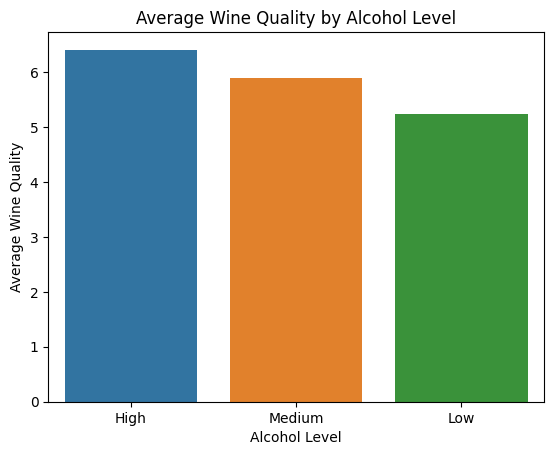

In [22]:
# Create a bar plot of average wine quality by alcohol level
alcohol_quality = wine.groupby('Alcohol_Level')['quality'].mean().sort_values(ascending=False)
sns.barplot(x=alcohol_quality.index, y=alcohol_quality.values)
plt.xlabel('Alcohol Level')
plt.ylabel('Average Wine Quality')
plt.title('Average Wine Quality by Alcohol Level')
plt.show()

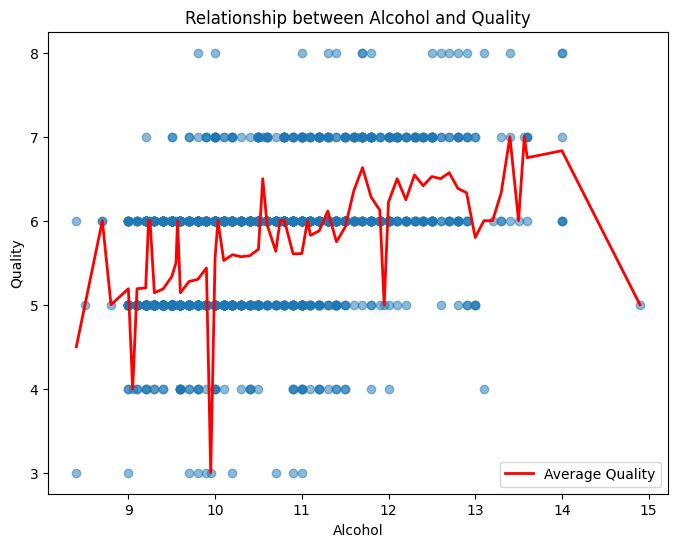

In [23]:
# Calculate the average quality for each alcohol level
avg_quality_by_alcohol = wine.groupby('alcohol')['quality'].mean()

# Plot the relationship between alcohol and quality
plt.figure(figsize=(8, 6))
plt.scatter(wine['alcohol'], wine['quality'], alpha=0.5)
plt.plot(avg_quality_by_alcohol.index, avg_quality_by_alcohol.values, color='red', linewidth=2, label='Average Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Relationship between Alcohol and Quality')
plt.legend()
plt.show()

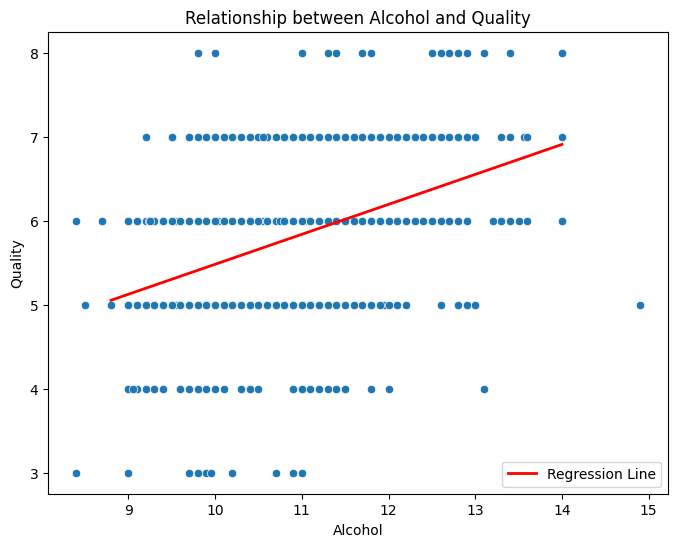

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X = wine[['alcohol']]
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Plot the relationship between alcohol and quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine)
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Relationship between Alcohol and Quality')
plt.legend()
plt.show()

<ipython-input-25-2902e85d4e93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_alcohol = wine.corr()['alcohol'].drop('alcohol')


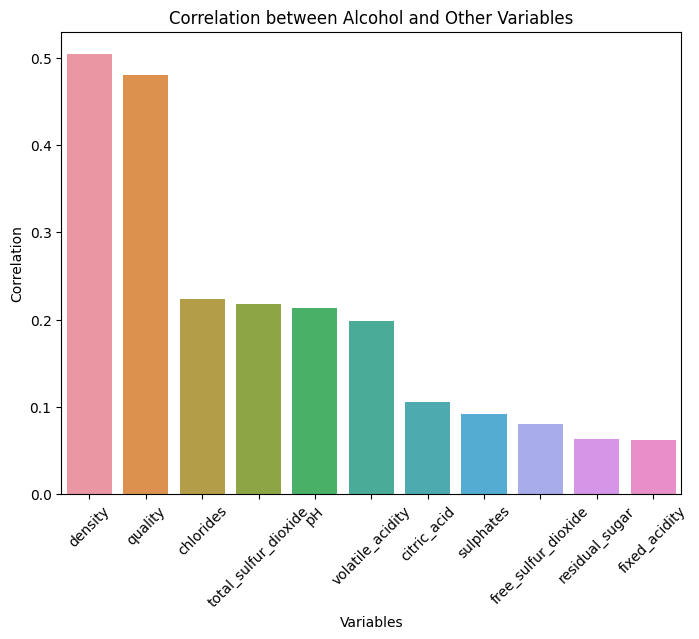

In [25]:
# Calculate the correlation coefficients between alcohol and other variables
correlation_alcohol = wine.corr()['alcohol'].drop('alcohol')

# Sort the correlation coefficients in descending order
sorted_correlation = correlation_alcohol.abs().sort_values(ascending=False)

# Plot the correlation coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Alcohol and Other Variables')
plt.xticks(rotation=45)
plt.show()

In [26]:
# find min, max of sulphates
print('sulphates_max = ',wine['sulphates'].max())
print('sulphates_min = ', wine['sulphates'].min())

sulphates_max =  2.0
sulphates_min =  0.33


Text(0.5, 1.0, 'Sulphates in different wine quality types')

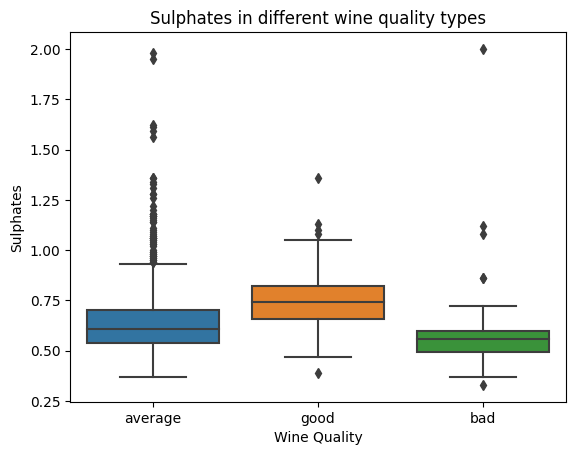

In [27]:
# Analysis of sulphates with wine ratings
sns.boxplot(data=wine, x= 'rating', y = 'sulphates')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates')
plt.title('Sulphates in different wine quality types')

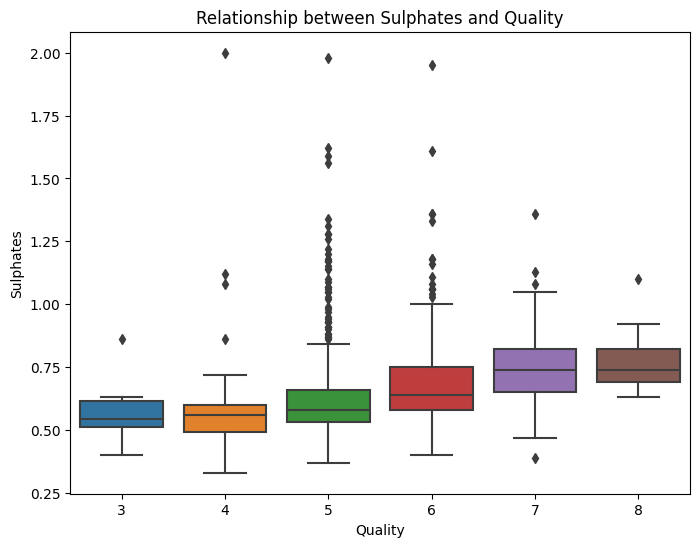

In [28]:
# Plot the relationship between sulphates and quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='sulphates', data=wine)
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.title('Relationship between Sulphates and Quality')
plt.show()

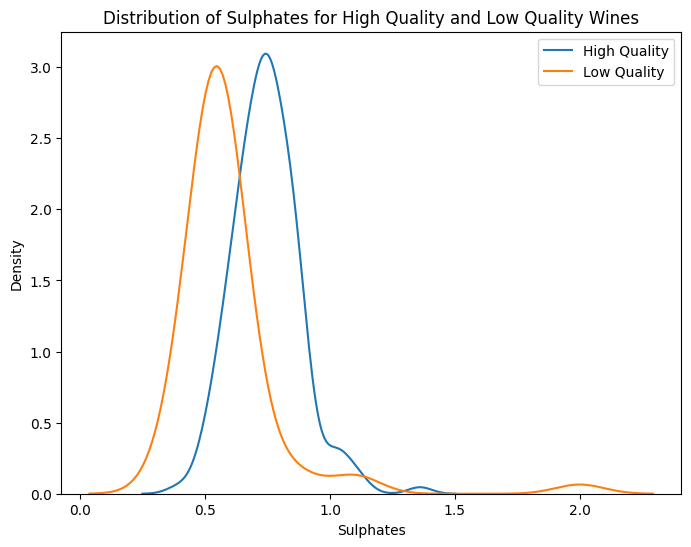

In [29]:
# Split the data into two groups: high quality and low quality
high_quality = wine[wine['quality'] >= 7]
low_quality = wine[wine['quality'] <= 4]

# Plot the distribution of sulphates for high quality and low quality wines
plt.figure(figsize=(8, 6))
sns.kdeplot(high_quality['sulphates'], label='High Quality')
sns.kdeplot(low_quality['sulphates'], label='Low Quality')
plt.xlabel('Sulphates')
plt.ylabel('Density')
plt.title('Distribution of Sulphates for High Quality and Low Quality Wines')
plt.legend()
plt.show()

In [30]:
# Perform a t-test to compare the mean sulphates of high quality and low quality wines
from scipy import stats
t_statistic, p_value = stats.ttest_ind(high_quality['sulphates'], low_quality['sulphates'])
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 6.50
P-value: 0.0000


<ipython-input-31-c64cb8efab61>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_sulphates = wine.corr()['sulphates'].drop('sulphates')


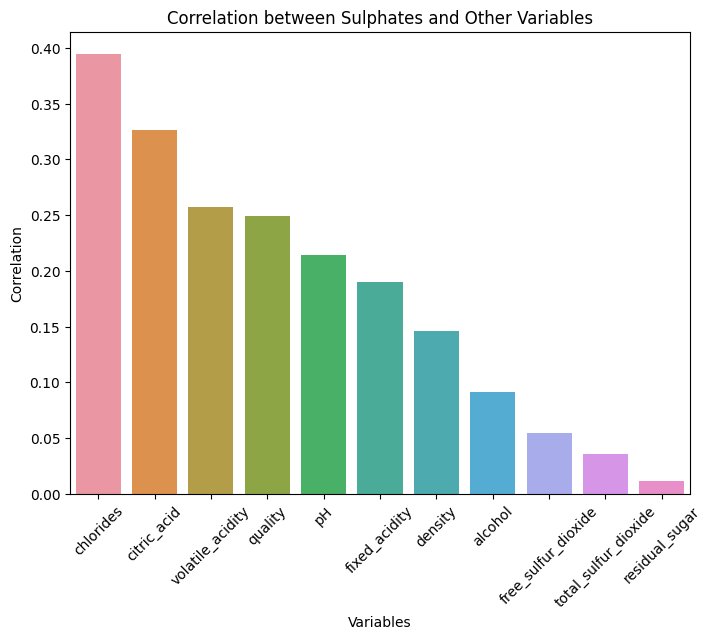

In [31]:
# Calculate the correlation coefficients between sulfates and other variables
correlation_sulphates = wine.corr()['sulphates'].drop('sulphates')

# Sort the correlation coefficients in descending order
sorted_correlation = correlation_sulphates.abs().sort_values(ascending=False)

# Plot the correlation coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Sulphates and Other Variables')
plt.xticks(rotation=45)
plt.show()

In [32]:
# find min, max of citric acid
print('citric_acid_max = ',wine['citric_acid'].max())
print('citric_acid_min = ', wine['citric_acid'].min())

citric_acid_max =  1.0
citric_acid_min =  0.0


Text(0.5, 1.0, 'Citric Acid in different wine wine ratings')

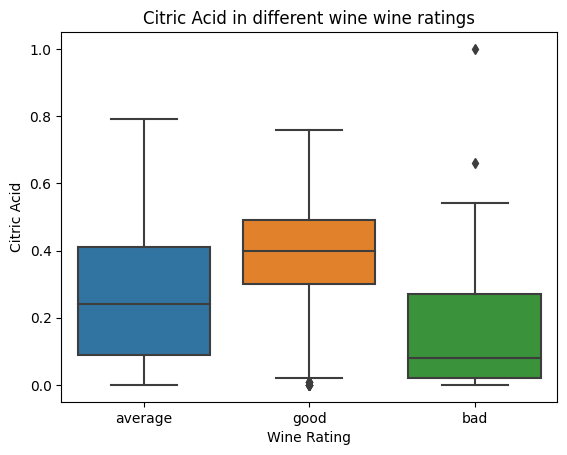

In [33]:
# Analysis of acid citric with wine rating
sns.boxplot(data=wine, x= 'rating', y = 'citric_acid')
plt.xlabel('Wine Rating')
plt.ylabel('Citric Acid')
plt.title('Citric Acid in different wine wine ratings')

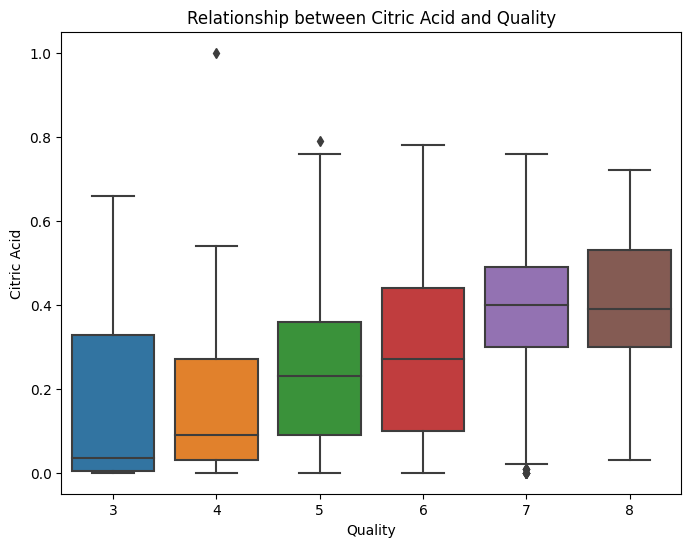

In [34]:
# Plot the relationship between citric acid and quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='citric_acid', data=wine)
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Relationship between Citric Acid and Quality')
plt.show()

In [35]:
# Calculate the correlation coefficient between citric acid and quality
correlation_citric = wine['citric_acid'].corr(wine['quality'])
print(f"Correlation between Citric Acid and Quality: {correlation_citric:.2f}")

Correlation between Citric Acid and Quality: 0.23


<ipython-input-36-f244ed5efc7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  citric_acid_corr = wine.corr()['citric_acid'].drop('citric_acid')


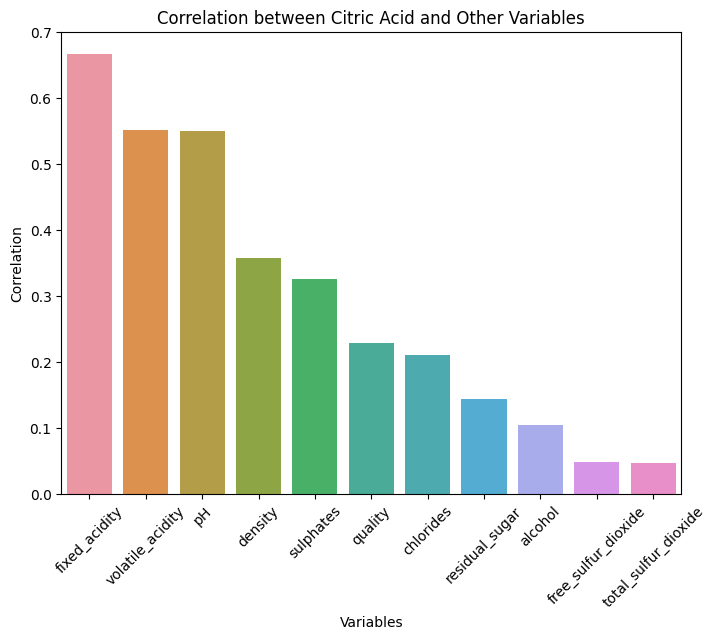

In [36]:
# Calculate the correlation coefficients between citric acid and other variables
citric_acid_corr = wine.corr()['citric_acid'].drop('citric_acid')
# Sort the correlation coefficients in descending order
sorted_citric_acid_corr = citric_acid_corr.abs().sort_values(ascending=False)
# Plot the correlation coefficients for citric acid
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_citric_acid_corr.index, y=sorted_citric_acid_corr)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Citric Acid and Other Variables')
plt.xticks(rotation=45)
plt.show()

In [37]:
# find min, max of fixed acidity
print('fixed_acidity_max = ',wine['fixed_acidity'].max())
print('fixed_acidity_min = ', wine['fixed_acidity'].min())

fixed_acidity_max =  15.9
fixed_acidity_min =  4.6


Text(0.5, 1.0, 'Fixed Acidity in different wine wine ratings')

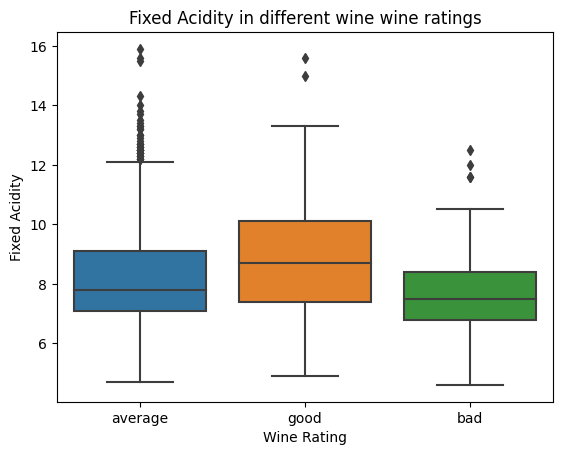

In [38]:
# Analysis of fixed acidity with wine rating
sns.boxplot(data=wine, x= 'rating', y = 'fixed_acidity')
plt.xlabel('Wine Rating')
plt.ylabel('Fixed Acidity')
plt.title('Fixed Acidity in different wine wine ratings')

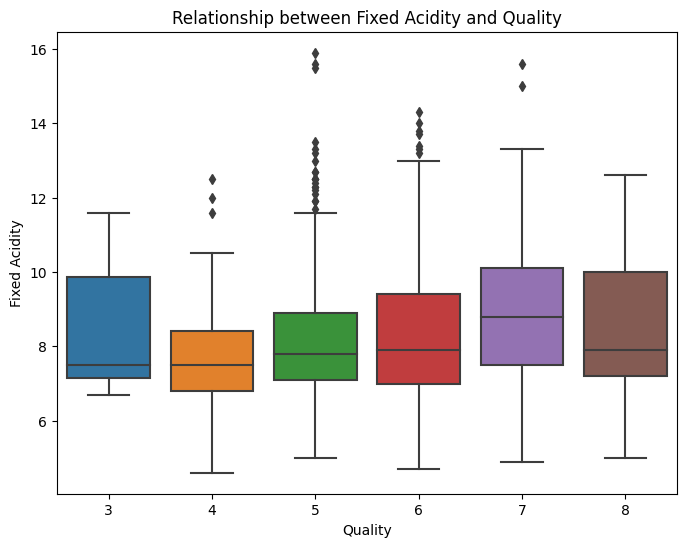

In [39]:
# Plot the relationship between acid and quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='fixed_acidity', data=wine)
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Relationship between Fixed Acidity and Quality')
plt.show()


In [40]:
# Calculate the correlation coefficient between acid and quality
correlation = wine['fixed_acidity'].corr(wine['quality'])
print(f"Correlation between Acid and Quality: {correlation:.2f}")

Correlation between Acid and Quality: 0.12


<ipython-input-41-e1817a0a3d9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fixed_acidity_corr = wine.corr()['fixed_acidity'].drop('fixed_acidity')


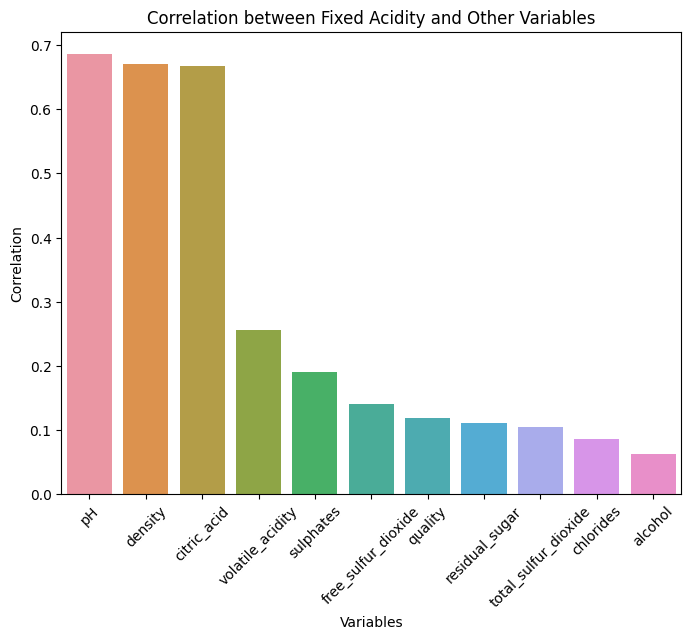

In [41]:
# Calculate the correlation coefficients between fixed acidity and other variables
fixed_acidity_corr = wine.corr()['fixed_acidity'].drop('fixed_acidity')
# Sort the correlation coefficients in descending order
sorted_fixed_acidity_corr = fixed_acidity_corr.abs().sort_values(ascending=False)
# Plot the correlation coefficients for fixed acidity
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_fixed_acidity_corr.index, y=sorted_fixed_acidity_corr)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Fixed Acidity and Other Variables')
plt.xticks(rotation=45)
plt.show()

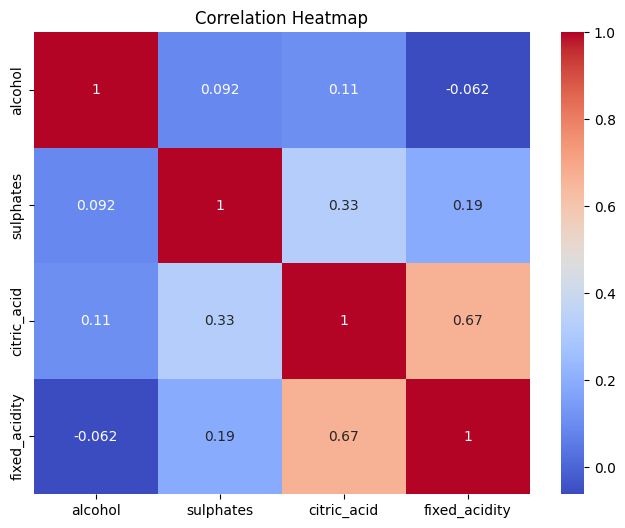

In [42]:
# The relationship between the alcohol, sulphates, citric acid and fixed acidity
# Select the columns of interest
columns_of_interest = ['alcohol', 'sulphates', 'citric_acid', 'fixed_acidity']
subset_wine = wine[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_wine.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Linear Regression

In [43]:
X = wine[['alcohol','sulphates','citric_acid','fixed_acidity']]
y = wine['quality']

In [44]:
X.head()

,alcohol,sulphates,citric_acid,fixed_acidity
0,9.4,0.56,0.00,7.4
1,9.8,0.68,0.00,7.8
2,9.8,0.65,0.04,7.8
3,9.8,0.58,0.56,11.2
5,9.4,0.56,0.00,7.4


In [45]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_train, y_train)

# Predict on the testing set
y_pred = linear_regression.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 0.4251290351376037
Mean Absolute Error (MAE): 0.5070986547167846
R-squared Score (R2): 0.3225478905914432


In [48]:
# Score = 32% model fit with ~ 32% data. This is not suitable model

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [50]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.63      0.81      0.71       122
           6       0.51      0.53      0.52       108
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00         6

    accuracy                           0.57       272
   macro avg       0.23      0.27      0.25       272
weighted avg       0.48      0.57      0.52       272



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [51]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5735294117647058


### Kmeans

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

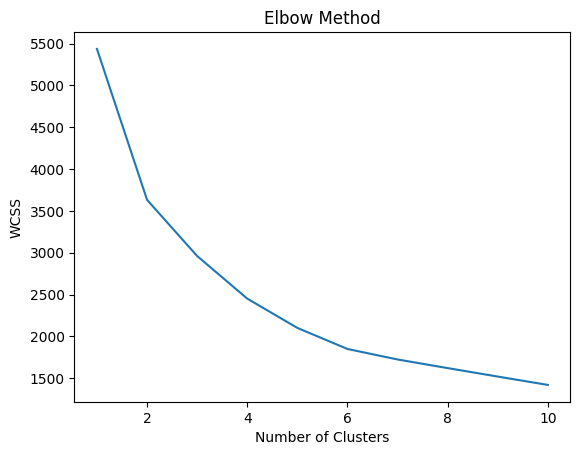

In [55]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
# Perform K-means clustering with the chosen number of clusters
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# Add the cluster labels to the original dataset
wine['cluster'] = labels

In [58]:
# Analyze the clusters
cluster_stats = wine.groupby('cluster')['quality'].describe()
print(cluster_stats)

         count      mean       std  min  25%  50%  75%  max
cluster                                                    
0         70.0  5.542857  0.810899  4.0  5.0  5.0  6.0  8.0
1        581.0  5.290878  0.612853  3.0  5.0  5.0  6.0  7.0
2        223.0  5.739910  0.892700  3.0  5.0  6.0  6.0  8.0
3        257.0  6.272374  0.772915  4.0  6.0  6.0  7.0  8.0
4        228.0  5.649123  0.818104  3.0  5.0  6.0  6.0  8.0


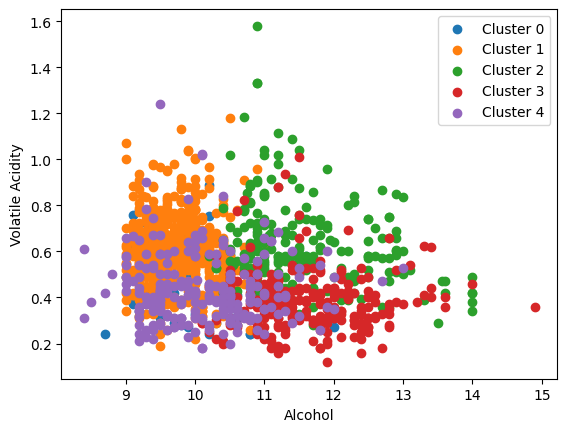

In [59]:
# Visualize the clusters
for cluster in range(k):
    cluster_data = wine[wine['cluster'] == cluster]
    plt.scatter(cluster_data['alcohol'], cluster_data['volatile_acidity'], label=f'Cluster {cluster}')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import pairwise_distances

# Assuming you have already performed K-means clustering and have the cluster labels in 'labels'

# Compute the cluster centroids
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
centroids = kmeans.cluster_centers_

# Calculate the within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_

# Calculate the total sum of squares (TSS)
tss = np.sum(pairwise_distances(X_scaled, centroids)**2)

# Calculate the between-cluster sum of squares (BCSS)
bcss = tss - wcss

# Calculate the variance ratio criterion (VRC)
vrc = bcss / tss

# Print the WCSS and VRC scores
print("WCSS:", wcss)
print("VRC:", vrc)

WCSS: 2100.8359575958893
VRC: 0.9605740631182292


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
# Score = 96% model fit with ~ 94% data. This is suitable model

### Random Forest Classifer

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [63]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Assess feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(sorted_features, feature_importance[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         8
           5       0.61      0.75      0.68       122
           6       0.49      0.45      0.47       108
           7       0.45      0.32      0.38        28
           8       0.00      0.00      0.00         6

    accuracy                           0.55       272
   macro avg       0.26      0.25      0.25       272
weighted avg       0.52      0.55      0.53       272

Feature Importance:
alcohol: 0.2899
sulphates: 0.2451
fixed_acidity: 0.2370
citric_acid: 0.2281


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_regressor.predict(X_test)

# Calculate the variance score
variance_score = explained_variance_score(y_test, y_pred)

# Print the variance score
print("Variance Score:", variance_score)

Variance Score: 0.2678309412540878
